In [7]:
!pip install pdf2image
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (273 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


In [8]:
from pdf2image import convert_from_path

# Define the path to the PDF
pdf_path = '/content/In-Vivo_Hyperspectral_Human_Brain_Image_Database_for_Brain_Cancer_Detection.pdf'

# Convert PDF to images, one per page
pages = convert_from_path(pdf_path, dpi=300)

# Save each page as an image
for i, page in enumerate(pages):
    image_path = f"/content/page_{i + 1}.jpg"
    page.save(image_path, 'JPEG')
    print(f"Saved {image_path}")


Saved /content/page_1.jpg
Saved /content/page_2.jpg
Saved /content/page_3.jpg
Saved /content/page_4.jpg
Saved /content/page_5.jpg
Saved /content/page_6.jpg
Saved /content/page_7.jpg
Saved /content/page_8.jpg
Saved /content/page_9.jpg
Saved /content/page_10.jpg
Saved /content/page_11.jpg
Saved /content/page_12.jpg
Saved /content/page_13.jpg
Saved /content/page_14.jpg
Saved /content/page_15.jpg
Saved /content/page_16.jpg
Saved /content/page_17.jpg
Saved /content/page_18.jpg
Saved /content/page_19.jpg


In [4]:
import PyPDF2

# Define the path to the PDF file
pdf_path = '/content/In-Vivo_Hyperspectral_Human_Brain_Image_Database_for_Brain_Cancer_Detection.pdf'

# Open the PDF file
with open(pdf_path, 'rb') as file:
    pdf_reader = PyPDF2.PdfReader(file)
    num_pages = len(pdf_reader.pages)

    # Extract text from each page
    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]
        text = page.extract_text()
        print(f"Page {page_num + 1}:\n{text}\n")


Page 1:
Received February 12, 2019, accepted March 7, 2019, date of publication March 14, 2019, date of current version April 5, 2019.
Digital Object Identifier 10.1 109/ACCESS.2019.2904788
In-Vivo Hyperspectral Human Brain Image
Database for Brain Cancer Detection
HIMAR FABELO
1, SAMUEL ORTEGA
1, ADAM SZOLNA2, DIEDERIK BULTERS3,
JUAN F. PIÑEIRO2, SILVESTER KABWAMA3, ARUMA J-O'SHANAHAN2,
HARRY BULSTRODE4, SARA BISSHOPP2, B. RAVI KIRAN5, DANIELE RAVI6,
RAQUEL LAZCANO
7, DANIEL MADROÑAL
7, CORALIA SOSA2, CARLOS ESPINO2, MARIANO
MARQUEZ2, MARÍA DE LA LUZ PLAZA8, RAFAEL CAMACHO8, DAVID CARRERA2, MARÍA
HERNÁNDEZ2, GUSTAVO M. CALLICÓ
1, (Member, IEEE), JESÚS MORERA MOLINA2, BOGDAN
STANCIULESCU9, GUANG-ZHONG YANG6, (Fellow, IEEE), RUBÉN SALVADOR
7, EDUARDO
JUÁREZ7, (Member, IEEE), CÉSAR SANZ
7, (Senior Member, IEEE),
AND ROBERTO SARMIENTO
1
1Institute for Applied Microelectronics, University of Las Palmas de Gran Canaria, 35017 Las Palmas de Gran Canaria, Spain
2Department of Neurosurgery, Un

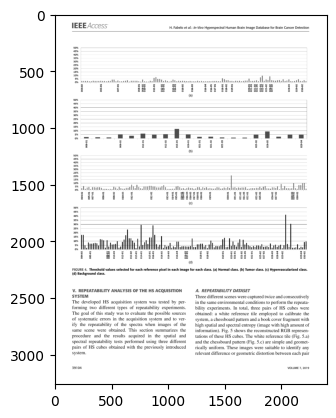

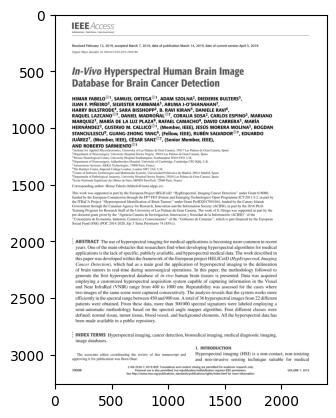

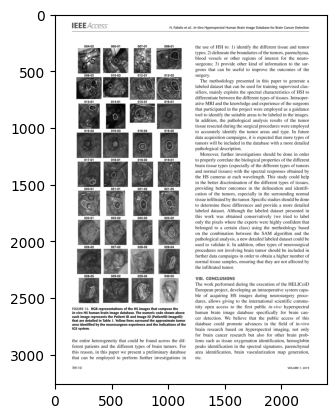

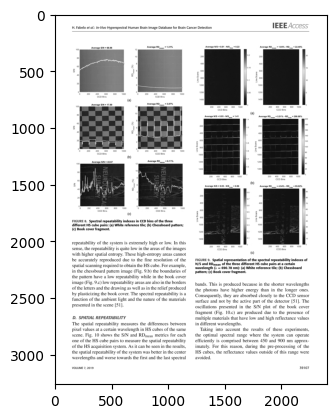

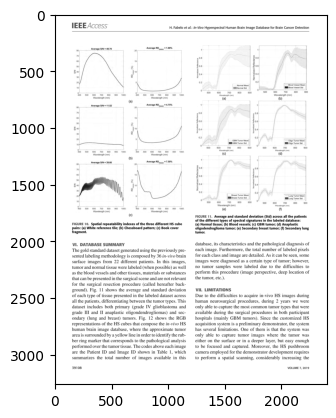

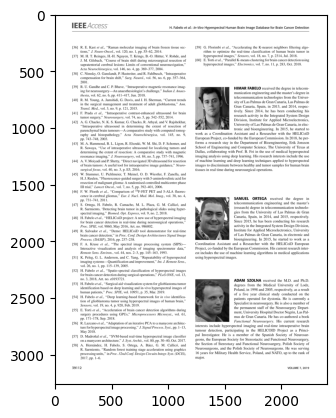

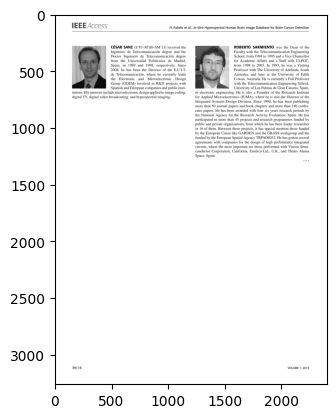

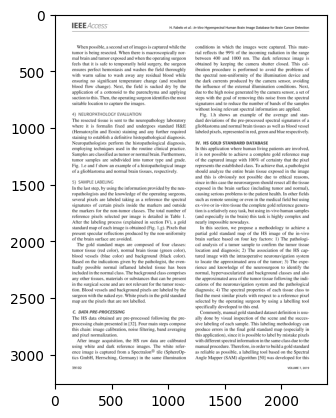

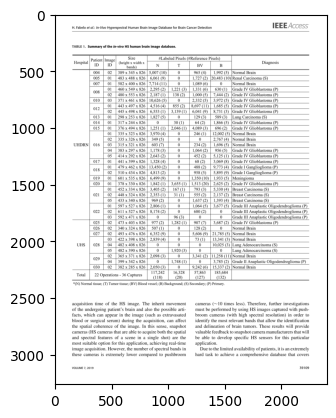

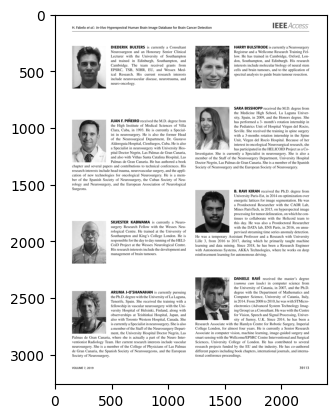

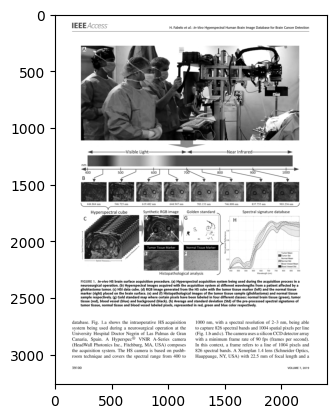

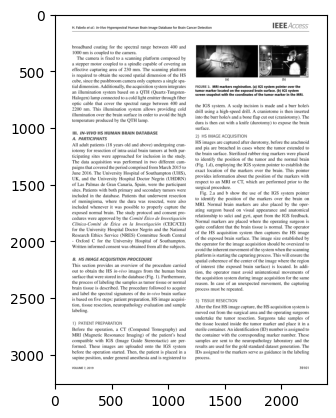

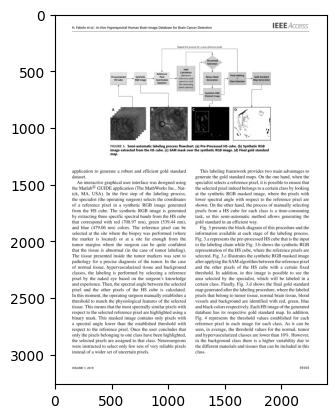

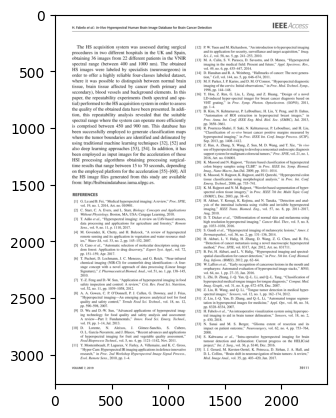

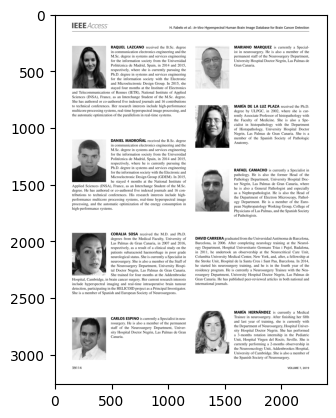

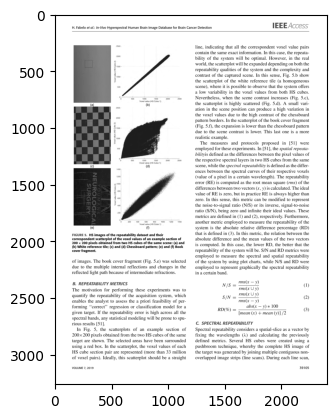

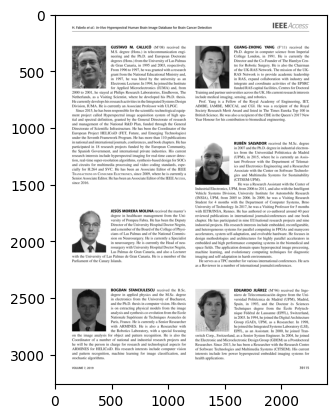

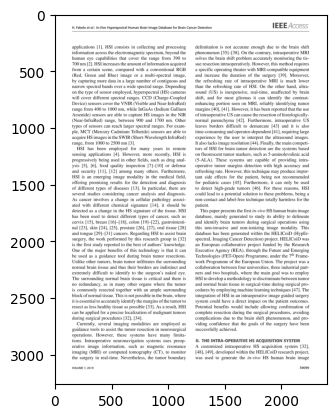

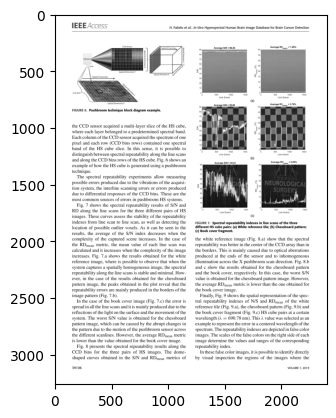

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load all images from the saved PDF pages
image_paths = glob.glob("/content/page_*.jpg")

# Convert each image to grayscale and normalize
grayscale_images = []
for path in image_paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Normalize the image
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    grayscale_images.append(normalized_image)
    plt.imshow(normalized_image, cmap='gray')
    plt.show()


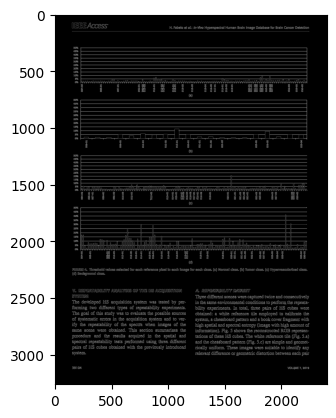

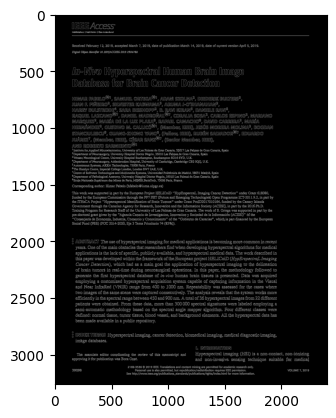

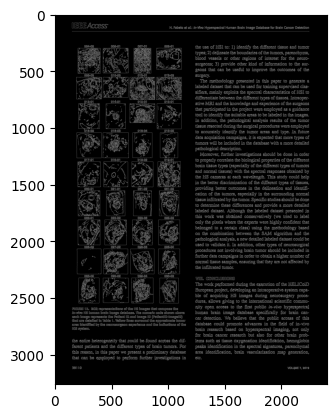

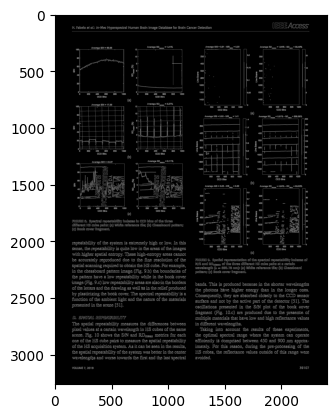

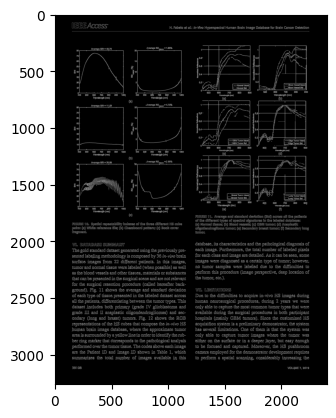

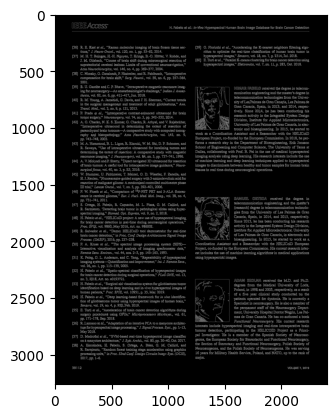

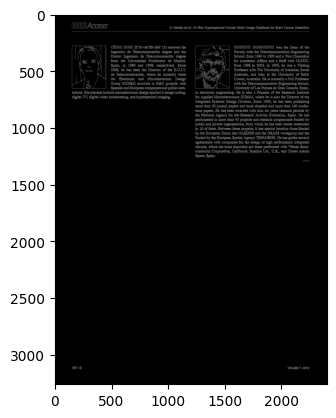

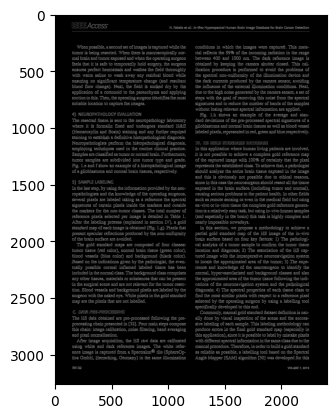

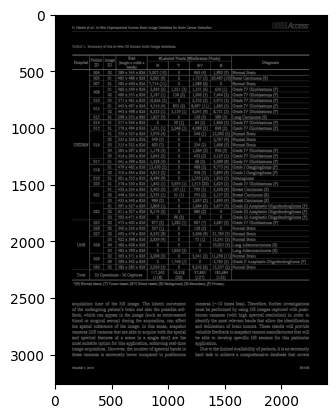

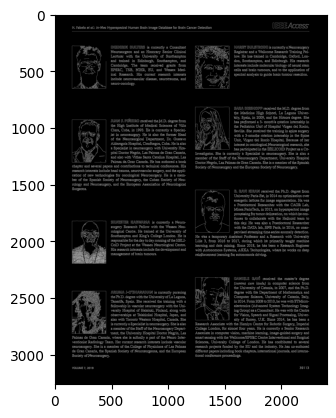

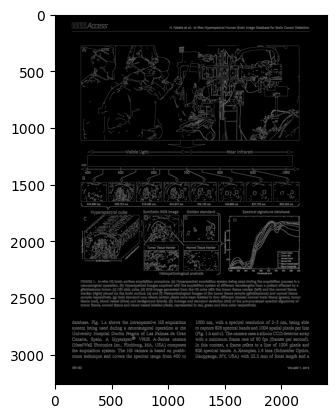

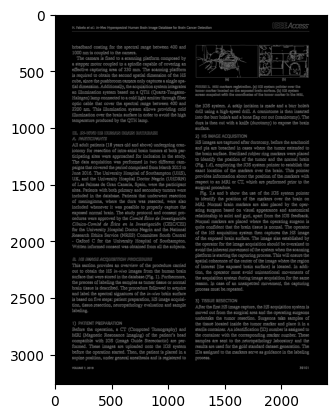

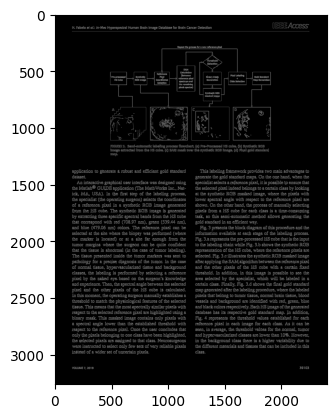

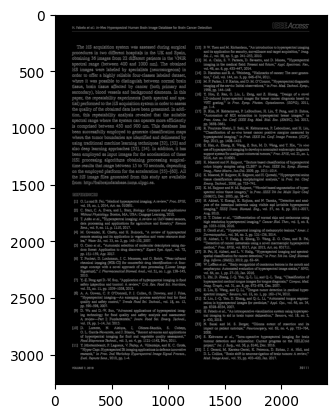

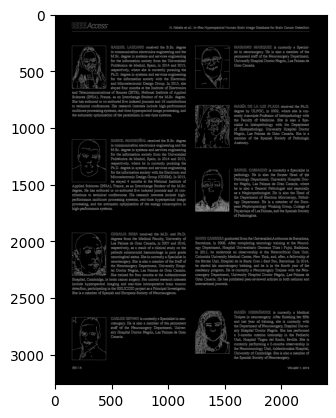

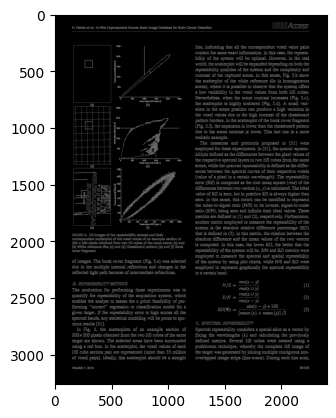

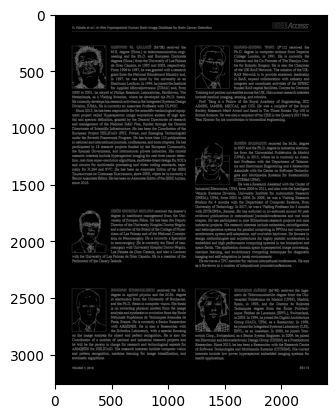

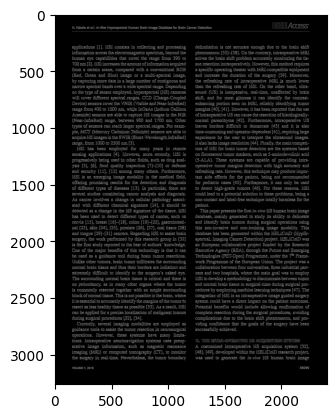

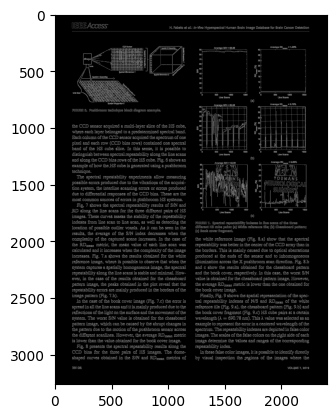

In [10]:
# Apply edge detection to each image to locate regions of interest
edge_images = []
for image in grayscale_images:
    edges = cv2.Canny(image, threshold1=30, threshold2=100)
    edge_images.append(edges)
    plt.imshow(edges, cmap='gray')
    plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN model
def create_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assume input shape of images
input_shape = (128, 128, 1)  # Adjust if necessary
model = create_cnn(input_shape)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,515,329 (24.85 MB)

 Trainable params: 6,515,329 (24.85 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize and reshape each grayscale image for CNN input
resized_images = [cv2.resize(img, (128, 128)).reshape(128, 128, 1) for img in grayscale_images]
resized_images = np.array(resized_images)

# Dummy labels (replace these with actual labels: 1 for tumor, 0 for non-tumor if you have labels)
labels = np.array([0, 1] * (len(resized_images) // 2))  # Just an example pattern

# Split into training and validation sets
train_images, val_images = resized_images[:int(0.8 * len(resized_images))], resized_images[int(0.8 * len(resized_images)):]
train_labels, val_labels = labels[:int(0.8 * len(labels))], labels[int(0.8 * len(labels)):]


In [14]:
print("Number of training images:", len(train_images))
print("Number of training labels:", len(train_labels))
print("Number of validation images:", len(val_images))
print("Number of validation labels:", len(val_labels))


Number of training images: 15
Number of training labels: 14
Number of validation images: 4
Number of validation labels: 4


In [15]:
# Ensure both training images and labels have the same length
min_length_train = min(len(train_images), len(train_labels))
train_images, train_labels = train_images[:min_length_train], train_labels[:min_length_train]

# Ensure both validation images and labels have the same length
min_length_val = min(len(val_images), len(val_labels))
val_images, val_labels = val_images[:min_length_val], val_labels[:min_length_val]


In [16]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=4, validation_data=(val_images, val_labels))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 789ms/step - accuracy: 0.5750 - loss: 690.1403 - val_accuracy: 0.5000 - val_loss: 163.1951
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 100.8637 - val_accuracy: 0.5000 - val_loss: 12.6419
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5952 - loss: 9.8999 - val_accuracy: 0.5000 - val_loss: 4.2354
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7190 - loss: 1.2357 - val_accuracy: 0.7500 - val_loss: 0.5450
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8845 - loss: 0.3120 - val_accuracy: 0.5000 - val_loss: 5.4040
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8345 - loss: 1.0943 - val_accuracy: 0.5000 - val_loss: 3.4255
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9548 - loss: 0.1523 - val_accuracy: 0.5000 - val_loss: 21.1051
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6405 - loss: 7.8017 - val_accuracy: 0.7500 - val_loss

In [17]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 1.0000 - loss: 0.2409
Validation Loss: 0.24090439081192017
Validation Accuracy: 1.0


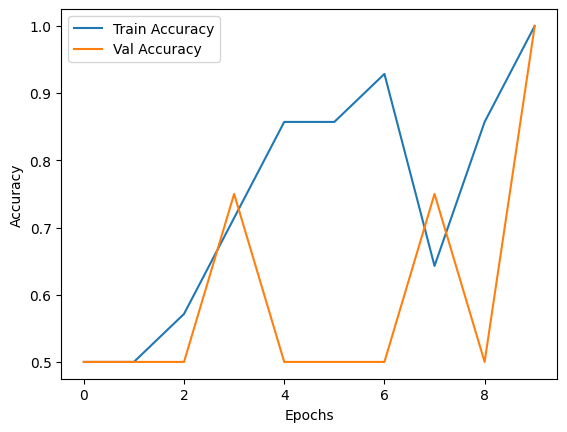

In [18]:
# Plot training & validation accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_true is your true labels and y_pred are your predictions
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # Replace with your true labels
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])  # Replace with your predicted labels

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Calculate Sensitivity
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

# Calculate Specificity
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Calculate MCC
mcc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) != 0 else 0

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"MCC: {mcc:.2f}")


Sensitivity: 0.80
Specificity: 0.80
MCC: 0.60


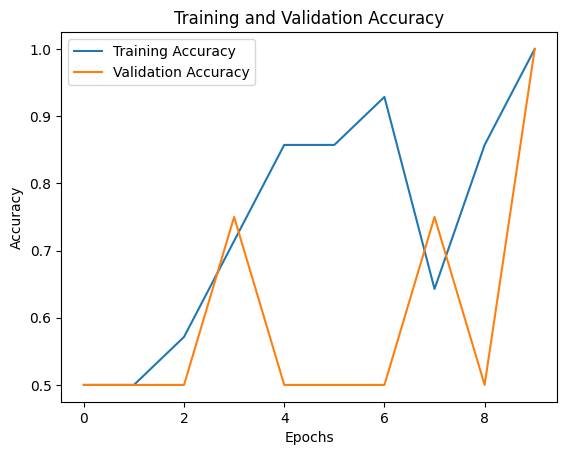

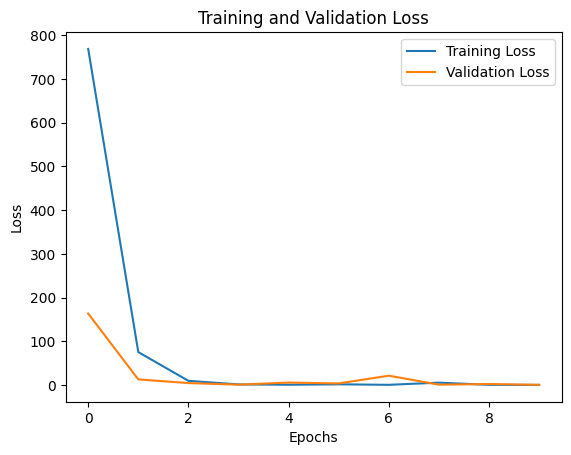

In [19]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Make predictions on validation set
predictions = (model.predict(val_images) > 0.5).astype("int32")

# Accuracy and F1 score
print("Validation Accuracy:", accuracy_score(val_labels, predictions))
print("F1 Score:", f1_score(val_labels, predictions))

# Classification report
print("Classification Report:\n", classification_report(val_labels, predictions))

# Confusion matrix
conf_matrix = confusion_matrix(val_labels, predictions)
print("Confusion Matrix:\n", conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Validation Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[2 0]
 [0 2]]


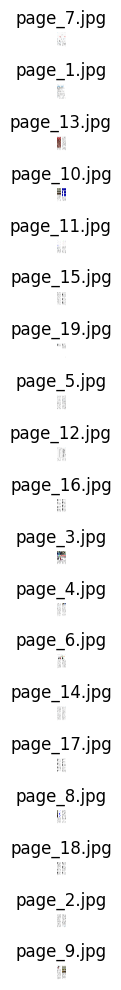

In [21]:
import matplotlib.pyplot as plt
import os

# Define the directory containing the extracted images
image_folder = '/content/'

# List all images saved from the PDF
image_files = [f for f in os.listdir(image_folder) if f.startswith('page_') and f.endswith('.jpg')]

# Display the images
plt.figure(figsize=(10, 10))
for i, image_file in enumerate(image_files):
    img = plt.imread(os.path.join(image_folder, image_file))
    plt.subplot(len(image_files), 1, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)

plt.tight_layout()
plt.show()
